In [2]:
from PreFRBLE.likelihood import *
from PreFRBLE.plot import *


### Identify  intervening galaxies
Here we attempto to identify LoS with intervening galaxies.
For this purpose, we compare the likelihood of temporal broadening $L(\tau)$ for scenarios with and without intervening galaxies, as well as consider a scenario that realistically considers the probability for LoS to intersect an additoinal galaxy.

In [3]:
## LoS without intervening galaxy

scenario_nointer = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

## LoS with intervening galaxy
scenario_inter = scenario_nointer.copy()
scenario_inter['Inter'] = ['Rodrigues18']

## same as
scenario_inter = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
    'Inter' : ['Rodrigues18'],
}

## Both scenarios mixed according to expected number of intervening galaxies N_inter as function of redshift ( NInter )
## not actually used here
scenario_inter_realistic = scenario_inter.copy()
scenario_inter_realistic['N_inter'] = True

## same as
scenario_inter_realistic = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
    'Inter' : ['Rodrigues18'],
    'N_inter' : True
}


### compare likelihoods
First, we compare the distribution of $\tau$ expected to be observed by ASKAP, CHIME and Parkes.
For easier interpretation we plot the complementary cumulative likelihood $L(>\tau)$, that shows how many $\tau$ are obseved above the given value

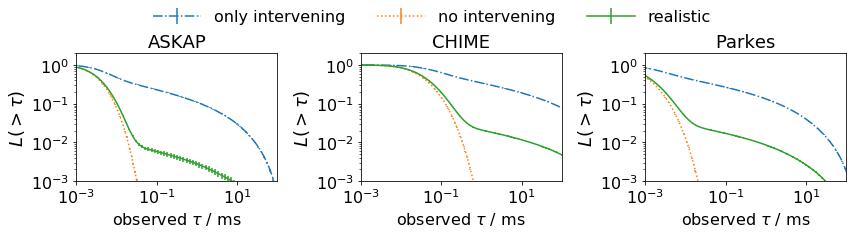

In [18]:
fig, axs = plt.subplots( 1, len(telescopes), figsize=(4*len(telescopes), 3) )
#fig, axs = plt.subplots( len(telescopes), 1, figsize=(4, len(telescopes)* 3) )

population = 'SMD'
scenarios = [scenario_inter, scenario_nointer,scenario_inter_realistic]
scenario_labels = ['only intervening', 'no intervening', 'realistic']
linestyles = ['-.', ':', '-']
for telescope, ax in zip( telescopes, axs):
    for i_s, scenario in enumerate(scenarios):
        
        L = GetLikelihood_Telescope( measure='tau', telescope=telescope, population='SMD', dev=True, **scenario )
        
        PlotLikelihood( *L, ax=ax, label=scenario_labels[i_s], linestyle=linestyles[i_s], measure='tau' , cumulative=-1 )#density=True )
        
    ax.set_title(labels[telescope], fontsize=18)
    ax.set_ylim(1e-3,2)
    ax.set_xlim(1e-3, 1e2)
    if telescope == telescopes[0]:
        fig.legend(loc='center', bbox_to_anchor= (.5, 1.01), ncol=3, borderaxespad=0, frameon=False, fontsize=16, handlelength=3 )

fig.tight_layout()

### Bayes factor & Posterior
calculate bayes factor $\mathcal{B}$ as ratio of the two likelihood functions shown above.
To obtain the posterior likelihood $L(\tau)$ for an $\tau$ to mark a LoS with an intervening galaxy, we have to multiply $\mathcal{B}$ by the ratio of prior likelihoods $\pi_{\rm inter}$, i. e. the ratio of expected amount of LoS with and without LoS.
This amount can be found via
$$
\pi_{\rm inter} = \int N_{\rm Inter}(z) \pi(z) \text{d}z .
$$

More info about $N_{\rm Inter}$ can be found in _model/Rodrigues18.ipynb_.
For $L(\tau)>10^2$, the LoS is intersected by an intervening galaxy with >99% certainty.

ASKAP_incoh: 2.5% of LoS have intervening galaxy


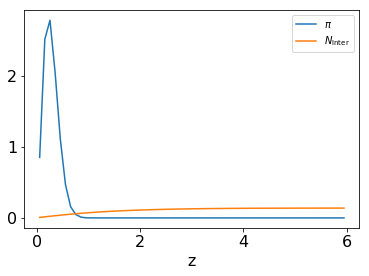

CHIME: 5.9% of LoS have intervening galaxy


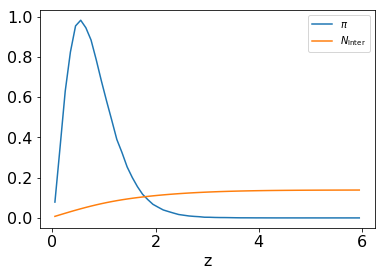

Parkes: 6.2% of LoS have intervening galaxy


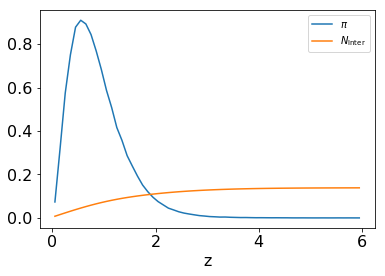

In [4]:
## first determine amount of intervened LoS

telescope = 'Parkes'
populations = 'SMD'
for telescope in telescopes:

    Lz = GetLikelihood_Redshift(  telescope=telescope, population=population )

    N_Inter = np.cumsum(nInter(redshift=redshift_range[-1]))

    pi_inter = np.sum( N_Inter * Lz[0] * np.diff(Lz[1]) )
    
    ##plot results
    fig, ax = plt.subplots()
    
    PlotLikelihood( *Lz, log=False, measure='z', ax=ax, label=r"$\pi$" )
    
    ax.plot( Lz[1][:-1] + np.diff(Lz[1])/2, N_Inter, label=r"$N_{\rm Inter}$" )

    print( "{}: {:.1f}% of LoS have intervening galaxy".format( telescope, 100*pi_inter ) )

    ax.set_ylabel('')
    ax.legend()
    plt.show()

#### Compute and plot posterior likelihood of $\tau$ to indicate an intervening galaxy

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:270: RuntimeWarning: invalid value encountered in double_scalars
  dev[ib] += add**2 * ( np.sum( ( devs[i_f][ix]*f[ix]*np.diff(x_) )**2 ) /np.sum( ( f[ix]*np.diff(x_) )**2 )  + dev_weights[i_f]**2 )


53
could not find L>100
B_last 1.7071003131201212 at -1
ASKAP_incoh: decisive for intervening galaxies: tau>0.059 ms
ASKAP_incoh, 26.827211 % of interveners identified
ASKAP_incoh, 0.002646 % of others give false positives
53
could not find L>100
B_last 34.90394091238636 at -1
CHIME: decisive for intervening galaxies: tau>1.768 ms
CHIME, 30.568578 % of interveners identified
CHIME, 0.000275 % of others give false positives
53
could not find L>100
B_last 40.02206580365109 at -1
Parkes: decisive for intervening galaxies: tau>0.059 ms
Parkes, 30.849642 % of interveners identified
Parkes, 0.000255 % of others give false positives


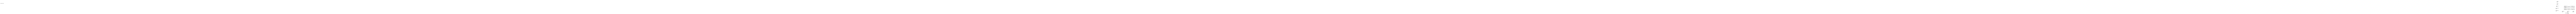

In [5]:
fig, ax = plt.subplots( figsize=(5,3))

population = 'SMD'

#for telescope, ax in zip( telescopes, axs):
for telescope, color, linestyle in zip(telescopes, colors_telescope, linestyles_population):
    P_i = GetLikelihood_Telescope( measure='tau', telescope=telescope, population='SMD', dev=True, **scenario_inter )
    P = GetLikelihood_Telescope( measure='tau', telescope=telescope, population='SMD', dev=True, **scenario_nointer )
    
    ## force both P to same range
    
    ## give both P ranges the same min and max
    x_max = np.min( [P[1][-1],P_i[1][-1]] )
    x_min = np.max( [P[1][0],P_i[1][0]] )
    P = LikelihoodMeasureable( *P, min=x_min, max=x_max)
    P_i = LikelihoodMeasureable( *P_i, min=x_min, max=x_max)
    
    ## give both P the same number of  bins
    bins = np.min([len(P[0]), len(P_i[0])])   
    print(bins)
    P = LikelihoodShrink(*P, bins=bins)
    P_i = LikelihoodShrink(*P_i, bins=bins)

    '''
    fig, axx = plt.subplots()
    PlotLikelihood( *P, ax=axx, measure='tau'  )
    PlotLikelihood( *P_i, ax=axx, ls=':'  )
    plt.show()
    '''
    
    ## check if successfull
    if not np.all(P[1] == P_i[1]):
        print("try harder!")
        print(P[1], P_i[1])
        break
#    """
    
    B = BayesFactors( P1=P_i[0], P2=P[0] )
    dev_B =  np.sqrt( P_i[2]**2 + P[2]**2 )
    
    ## obtain prior
    Pz = GetLikelihood_Redshift(  telescope=telescope, population=population )
    N_Inter = np.cumsum(nInter())
    pi_inter = np.sum( N_Inter * Pz[0] * np.diff(Pz[1]) )

    ## compute posterior
    B *= pi_inter/(1-pi_inter)
    
    try:
        i_tau = first( range(len(B)), lambda i: B[i] > 1e2 )
    except:
        print( "could not find L>100")
    ## highest value of P_nointer>0
        i_tau = -1  ### by construction, last value
    print( "B_last {} at {}".format( B[i_tau],i_tau) )
        
    tau_decisive = P[1][1:][i_tau]
    print( "{}: decisive for intervening galaxies: tau>{:.3f} ms".format(telescope,tau_decisive))

    ## better aestethics for results with P = 0
    B[B==1] = B[B!=1][-1] * 10.**np.arange(sum(B==1))
    
    ax.errorbar( P[1][1:], B, yerr=B*dev_B, label=r"%s, $\tau_{\rm decisive} = %.2f$ ms" % (labels[telescope], tau_decisive), color=color, linestyle=linestyle )
    ax.set_xlabel( r"$\tau$ / ms", fontdict={'size':18 } )
    ax.set_ylabel( r"$L$", fontdict={'size':18 }  )
#    ax.set_ylabel( r"$\mathcal{B}$", fontdict={'size':18 }  )

    
    ## compute how many LoS with intervening galaxies are identified / false positives
    P_i, x_i = GetLikelihood_Telescope( measure='tau', telescope=telescope, population='SMD', **scenario_inter )
    P, x = GetLikelihood_Telescope( measure='tau', telescope=telescope, population='SMD', **scenario_nointer )

    i_tau = first( range(len(P_i)), lambda i: x_i[i] > tau_decisive )
    print( "%s, %.6f %% of interveners identified" % ( telescope, 100*np.sum( P_i[i_tau:]*np.diff(x_i)[i_tau:] ) ) )

    try:
        i_tau = first( range(len(P)), lambda i: x[i] > tau_decisive )
    except: ## fails, if chosen  highest value of noInter
        i_tau = -1
    print( "%s, %.6f %% of others give false positives" % ( telescope, 100*np.sum( P[i_tau:]*np.diff(x)[i_tau:] ) ) )

ax.legend(loc='lower right', fontsize=14)
ax.loglog()
#ax.set_xlim(1e-2,1e2)
ax.set_ylim(1e-16,1e11)
PlotLimit(ax=ax, x=ax.get_xlim(), y=[1e2,1e2], lower_limit=True, label='decisive', shift_text_vertical=3e3, shift_text_horizontal=-0.95)
ax.tick_params(axis='both', which='major', labelsize=16)
#AllSidesTicks(ax)
#    """
    

If there is no plot, than no $L>100$ could be found.
This is, because for the highest possible $\tau$ without intervening galaxies, still $L < 100$.
However, above this value, $L=inf$ due to division by zero.

### compare to FRBcat
How many FRBs in FRBcat show $\tau > \tau_{\rm dist}$?
How many do we expect?

In [5]:
tau_dist = { ## in ms, copy from above
    'ASKAP_incoh' : 0.06,
    'Parkes' : 0.06,
    'CHIME' : 1.8
    
}

population='SMD'

for telescope in telescopes:
    FRBs = GetFRBcat( telescopes=[telescope])
    N_tau = sum(FRBs['tau'] > tau_dist[telescope]) 
    N_tot = len(FRBs)

    print("{}: {} of {}  > {} ms, {:.2f}%".format(telescope, N_tau, N_tot, tau_dist[telescope], 100*N_tau/N_tot))

    L = GetLikelihood_Telescope( measure='tau', telescope=telescope, population=population, **scenario_inter_realistic)
    ix = np.where(L[1] >= tau_dist[telescope])[0][0]
    print( "expect: {:.2f} %  > {} ms".format( 100*np.cumsum((L[0]*np.diff(L[1]))[::-1])[::-1][ix], tau_dist[telescope] ) )

    

ASKAP_incoh: 1 of 28  > 0.06 ms, 3.57%
expect: 0.67 %  > 0.06 ms
CHIME: 6 of 30  > 1.8 ms, 20.00%
expect: 1.81 %  > 1.8 ms
Parkes: 13 of 27  > 0.06 ms, 48.15%
expect: 1.91 %  > 0.06 ms


In [4]:
6.2/48, 48/1.9, 5.9/20, 20/1.8, 2.5/3.6, 3.6/0.67

(0.12916666666666668,
 25.263157894736842,
 0.29500000000000004,
 11.11111111111111,
 0.6944444444444444,
 5.3731343283582085)

### IGM outer scale

Can a smaller outer scale $L_0$ in the IGM account for $\tau > 0.06$ observed with Parkes?

Parkes SMD
1.91 %  > 0.06 ms for L_0 = 1 Mpc


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:66: RuntimeWarning: divide by zero encountered in power
  res =  ( P*np.diff(x)*N )**-0.5


15.02 %  > 0.06 ms for L_0 = 0.005 kpc


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:270: RuntimeWarning: invalid value encountered in double_scalars
  dev[ib] += add**2 * ( np.sum( ( devs[i_f][ix]*f[ix]*np.diff(x_) )**2 ) /np.sum( ( f[ix]*np.diff(x_) )**2 )  + dev_weights[i_f]**2 )


(0.001, 1)

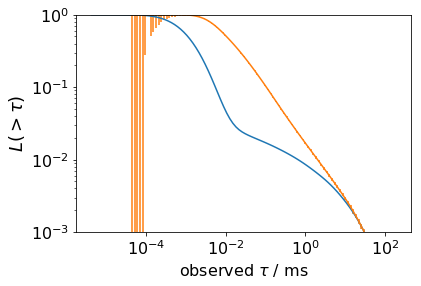

In [6]:
telescope = 'Parkes'
population = 'SMD'

print(telescope, population)

scenario_ref = scenario_inter_realistic
#scenario_ref = scenario_IGM

outer_scale = 0.005  # kpc

tmp = scenario_ref.copy()
tmp['L0'] = outer_scale

measure='tau'

cumulative = -1 ## for P(>tau)
fig, ax = plt.subplots()

L = GetLikelihood_Telescope( measure=measure, telescope=telescope, population=population, **scenario_ref  )
PlotLikelihood( *L, measure=measure, ax=ax, cumulative=cumulative)

try:
    ix = np.where(L[1] >= 0.06)[0][0]
    print( "{:.2f} %  > 0.06 ms for L_0 = 1 Mpc".format( 100*np.cumsum((L[0]*np.diff(L[1]))[::-1])[::-1][ix] ) )
except:
    print( "0  > 0.06 ms L_0 = 1 Mpc")

L = GetLikelihood_Telescope( measure=measure, force=tmp['L0']<1, **tmp)
PlotLikelihood( *L, measure=measure, ax=ax, cumulative=cumulative)

ix = np.where(L[1] >= 0.06)[0][0]
print( "{:.2f} %  > 0.06 ms for L_0 = {} kpc".format( 100*np.cumsum((L[0]*np.diff(L[1]))[::-1])[::-1][ix], outer_scale ) )


ax.set_ylim(1e-3,1)



This value is rather small, but does not yet suffice.
It is thus much more likely that a denser and more turbulent environemtn of the progenitor accounts for most $\tau > \tau_{\rm dist}$